# Languages

## About

JSON-LD fully support the identification of the language types.  For the canonical 
guide refernece [JSON-LD 1.1 Language-indexing section](https://www.w3.org/TR/json-ld/#language-indexing).

Properties such as label, description, keyword and others can be 
extended in the context with a container language attribute notation.

For example:

```json
{
  "@context": "https://schema.org/",
  "@type": "Person",
  "name": {"@value": "Jane Doe","@language": "en"},
  "jobTitle": "Professor",
  "telephone": "(425) 123-4567",
  "url": "http://www.janedoe.com"
}
```

Shows the name _Jane Doe_ as typed english.  

Use standard language codes (fr, es, en, de, etc) to
be used when describing these properties.   A list of codes can be seen
at the [Online Browsing Platform (OBP)](https://www.iso.org/obp/ui/#search and)
and [Popular standards ISO 3166 Country Codes](https://www.iso.org/iso-3166-country-codes.html).
Additional use the 2-letter codes is demonstrated below.  



```{literalinclude} ../../../odis-in/dataGraphs/thematics/languages/graphs/language.json
:linenos:
```

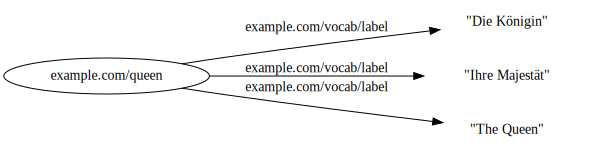

In [1]:
import json
from pyld import jsonld
import os, sys

currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)
from lib import jbutils


with open("../../../odis-in/dataGraphs/thematics/languages/graphs/language.json") as dgraph:
    doc = json.load(dgraph)

context = {
    "@vocab": "https://schema.org/",
}

compacted = jsonld.compact(doc, context)
jbutils.show_graph(compacted)

In graph space the resulting triples from the above are:

```
<http://example.com/queen> <http://example.com/vocab/label> "Die Königin"@de .
<http://example.com/queen> <http://example.com/vocab/label> "Ihre Majestät"@de .
<http://example.com/queen> <http://example.com/vocab/label> "The Queen"@en .
```

with language encoding attributes in place.  These can be used in
searching and result filters.

Note, this can cause issues in query space since the concept of

```
"Semua orang dilahirkan merdeka dan mempunyai martabat dan hak-hak yang sama. 
Mereka dikaruniai akal dan hati nurani dan hendaknya bergaul satu 
sama lain dalam semangat persaudaraan."
```

and
 
 ```
 "Semua orang dilahirkan merdeka dan mempunyai martabat 
 dan hak-hak yang sama. Mereka dikaruniai akal dan hati nurani 
 dan hendaknya bergaul satu sama lain dalam semangat persaudaraan."@id
 ``` 
 
are different and so care must be taken the creation of the SPARQL 
queries not to accidentally imposed implicate filters through the use 
of language types. 
 

When trying to note the language of a distribution, the approach is a bit different.
Here we are not noting the encoding of the literal value in a record. Rather, we are
providing information about a remote resource.  So for example:

```json
"distribution": [
    {
      "@type": "DataDownload",
      "contentUrl": "https://www.example-data-repository.org/dataset/3300/data/larval-krill.tsv",
      "encodingFormat": "text/tab-separated-values",
      "datePublished": "2010-02-03",
      "inLanguage": "de"	
    }
  ],
```

The above snippet is using the schema.org/inLanguage property to note the resources is in German.

Multiple distributions with multiple languages would look like

```json
"distribution": [
    {
      "@type": "DataDownload",
      "contentUrl": "https://www.example-data-repository.org/dataset/3300/data/larval-krill_de.tsv",
      "encodingFormat": "text/tab-separated-values",
      "datePublished": "2010-02-03",
      "inLanguage": "de"	
    },
   {
      "@type": "DataDownload",
      "contentUrl": "https://www.example-data-repository.org/dataset/3300/data/larval-krill_en.tsv",
      "encodingFormat": "text/tab-separated-values",
      "datePublished": "2010-02-03",
      "inLanguage": "en"	
    }
  ],
```

There is also the schema.org/knowsLanguage for use on other types like Person and Organization.

There you could use the short form like:

```json
"knowsLanguage" : "de"
```

or a more detailed approach like:

```json
"knowsLanguage" : {
      "@type": "Language",
      "name": "Spanish",
      "alternateName": "es"
    }
```